In [ ]:
import random
import numpy
import keras
import math
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
import seaborn as sns
from tensorflow import keras
from IPython import display
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from keras.datasets import cifar10,mnist,fashion_mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from matplotlib import pyplot
from keras.regularizers import l2

In [ ]:
(cifar10_xtrain, cifar10_ytrain), (cifar10_xtest, cifar10_ytest) = cifar10.load_data()
(mnist_xtrain, mnist_ytrain), (mnist_xtest, mnist_ytest) = mnist.load_data()
(fashion_mnist_xtrain, fashion_mnist_ytrain), (fashion_mnist_xtest, fashion_mnist_ytest)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# 1-1 - Normalization:

In [ ]:
cifar10_x_train, cifar10_y_train, cifar10_x_test, cifar10_y_test =  cifar10_xtrain/255.0, cifar10_ytrain, cifar10_xtest/255.0, cifar10_ytest
mnist_x_train, mnist_y_train, mnist_x_test, mnist_y_test = mnist_xtrain/255.0, mnist_ytrain, mnist_xtest/255.0, mnist_ytest
fashion_mnist_x_train, fashion_mnist_y_train, fashion_mnist_x_test, fashion_mnist_y_test = fashion_mnist_xtrain/255.0, fashion_mnist_ytrain, fashion_mnist_xtest/255.0, fashion_mnist_ytest

In [ ]:
print(cifar10_x_train.shape)
print(mnist_x_train.shape)
print(fashion_mnist_x_train.shape)

(50000, 32, 32, 3)
(60000, 28, 28)
(60000, 28, 28)


# 1-3-1: mnist:

In [ ]:
# SCNNB - mnist:
model_mnist_SCNNB = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[28, 28, 1]),
    BatchNormalization(),  #1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),  #2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_mnist_SCNNB.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_mnist_SCNNB = model_mnist_SCNNB.fit(mnist_x_train, mnist_y_train,batch_size=128, epochs=150, validation_data=(mnist_x_test, mnist_y_test))

Epoch 1/150
469/469 [==============================] - 14s 9ms/step - loss: 0.1635 - accuracy: 0.9543 - mse: 27.3892 - mae: 4.3737 - val_loss: 0.0745 - val_accuracy: 0.9766 - val_mse: 27.3366 - val_mae: 4.3630
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0501 - accuracy: 0.9844 - mse: 27.3923 - mae: 4.3737 - val_loss: 0.0335 - val_accuracy: 0.9885 - val_mse: 27.3388 - val_mae: 4.3630
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0344 - accuracy: 0.9889 - mse: 27.3929 - mae: 4.3737 - val_loss: 0.0332 - val_accuracy: 0.9893 - val_mse: 27.3391 - val_mae: 4.3630
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0258 - accuracy: 0.9918 - mse: 27.3933 - mae: 4.3737 - val_loss: 0.0270 - val_accuracy: 0.9912 - val_mse: 27.3393 - val_mae: 4.3630
Epoch 5/150
469/469 [==============================] - 3s 7ms/step - loss: 0.0206 - accuracy: 0.9934 - mse: 27.3935 - mae: 4.3737 - val_loss: 0.0247 - val_accuracy

In [ ]:
test_loss_mnist_SCNNB , test_acc_mnist_SCNNB ,test_mse_mnist_SCNNB, test_mae_mnist_SCNNB= model_mnist_SCNNB.evaluate(mnist_x_test,mnist_y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0310 - accuracy: 0.9945 - mse: 27.3401 - mae: 4.3630


In [ ]:
# SCNNB_a - mnist:
model_mnist_SCNNB_a = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[28, 28, 1]),
    #BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_mnist_SCNNB_a.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_mnist_SCNNB_a = model_mnist_SCNNB_a.fit(mnist_x_train, mnist_y_train,batch_size=128, epochs=150, validation_data=(mnist_x_test, mnist_y_test))

Epoch 1/150
469/469 [==============================] - 4s 7ms/step - loss: 0.1384 - accuracy: 0.9569 - mse: 27.3887 - mae: 4.3737 - val_loss: 0.0664 - val_accuracy: 0.9842 - val_mse: 27.3338 - val_mae: 4.3630
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0478 - accuracy: 0.9850 - mse: 27.3922 - mae: 4.3737 - val_loss: 0.0609 - val_accuracy: 0.9815 - val_mse: 27.3372 - val_mae: 4.3630
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0330 - accuracy: 0.9892 - mse: 27.3929 - mae: 4.3737 - val_loss: 0.0335 - val_accuracy: 0.9882 - val_mse: 27.3390 - val_mae: 4.3630
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0251 - accuracy: 0.9920 - mse: 27.3932 - mae: 4.3737 - val_loss: 0.0256 - val_accuracy: 0.9921 - val_mse: 27.3393 - val_mae: 4.3630
Epoch 5/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0194 - accuracy: 0.9939 - mse: 27.3934 - mae: 4.3737 - val_loss: 0.0302 - val_accuracy:

In [ ]:
test_loss_mnist_SCNNB_a , test_acc_mnist_SCNNB_a, test_mse_mnist_SCNNB_a, test_mae_mnist_SCNNB_a = model_mnist_SCNNB_a.evaluate(mnist_x_test,mnist_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9940 - mse: 27.3401 - mae: 4.3630


In [ ]:
# SCNNB_b - mnist:
model_mnist_SCNNB_b = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[28, 28, 1]),
    #BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    #BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_mnist_SCNNB_b.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_mnist_SCNNB_b = model_mnist_SCNNB_b.fit(mnist_x_train, mnist_y_train,batch_size=128, epochs=150, validation_data=(mnist_x_test, mnist_y_test))

Epoch 1/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3045 - accuracy: 0.9047 - mse: 27.3793 - mae: 4.3737 - val_loss: 0.0663 - val_accuracy: 0.9780 - val_mse: 27.3363 - val_mae: 4.3630
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0757 - accuracy: 0.9763 - mse: 27.3903 - mae: 4.3737 - val_loss: 0.0564 - val_accuracy: 0.9815 - val_mse: 27.3371 - val_mae: 4.3630
Epoch 3/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0528 - accuracy: 0.9838 - mse: 27.3916 - mae: 4.3737 - val_loss: 0.0354 - val_accuracy: 0.9878 - val_mse: 27.3382 - val_mae: 4.3630
Epoch 4/150
469/469 [==============================] - 3s 5ms/step - loss: 0.0446 - accuracy: 0.9861 - mse: 27.3920 - mae: 4.3737 - val_loss: 0.0320 - val_accuracy: 0.9890 - val_mse: 27.3386 - val_mae: 4.3630
Epoch 5/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0350 - accuracy: 0.9893 - mse: 27.3925 - mae: 4.3737 - val_loss: 0.0299 - val_accuracy:

In [ ]:
test_loss_mnist_SCNNB_b , test_acc_mnist_SCNNB_b, test_mse_mnist_SCNNB_b, test_mae_mnist_SCNNB_b = model_mnist_SCNNB_b.evaluate(mnist_x_test,mnist_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9940 - mse: 27.3401 - mae: 4.3630


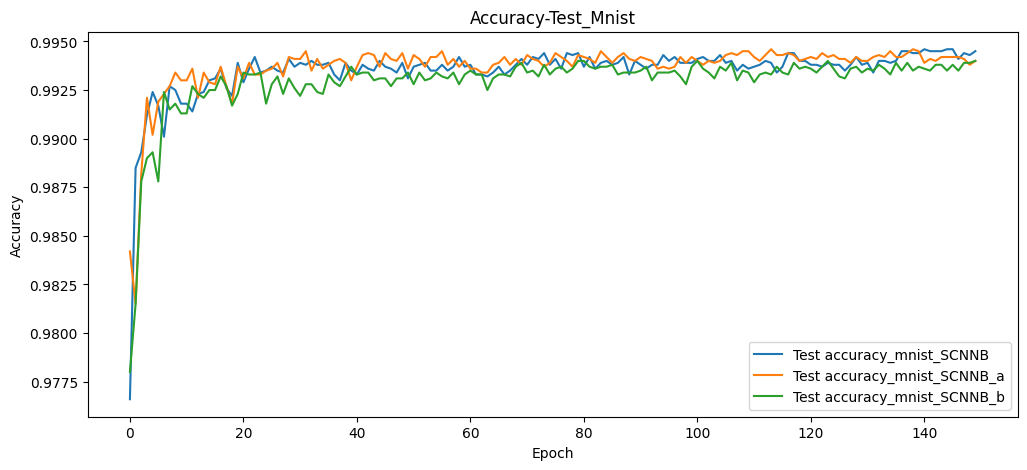

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(history_mnist_SCNNB.history["val_accuracy"], label="Test accuracy_mnist_SCNNB")
ax1.plot(history_mnist_SCNNB_a.history["val_accuracy"], label="Test accuracy_mnist_SCNNB_a")
ax1.plot(history_mnist_SCNNB_b.history["val_accuracy"], label="Test accuracy_mnist_SCNNB_b")
plt.title("Accuracy-Test_Mnist")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax1.legend()

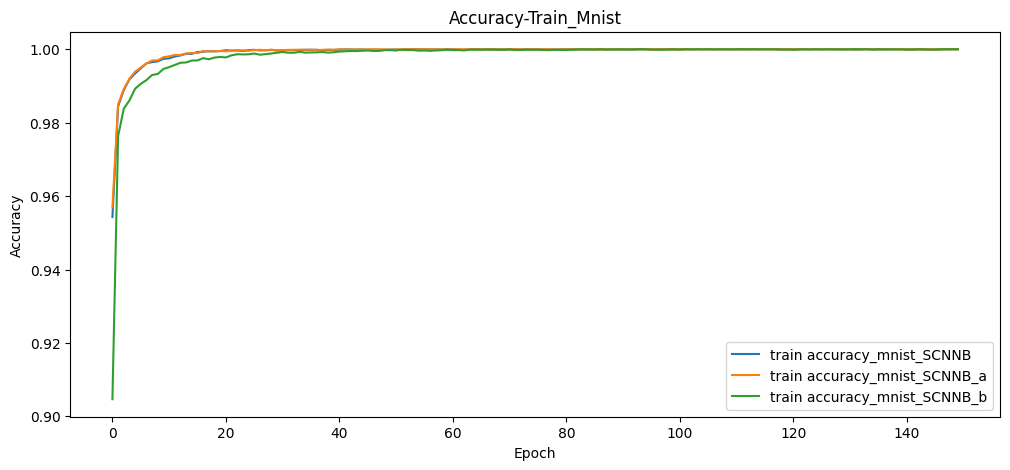

In [ ]:
fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.plot(history_mnist_SCNNB.history["accuracy"], label="train accuracy_mnist_SCNNB")
ax2.plot(history_mnist_SCNNB_a.history["accuracy"], label="train accuracy_mnist_SCNNB_a")
ax2.plot(history_mnist_SCNNB_b.history["accuracy"], label="train accuracy_mnist_SCNNB_b")
plt.title("Accuracy-Train_Mnist")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax2.legend()

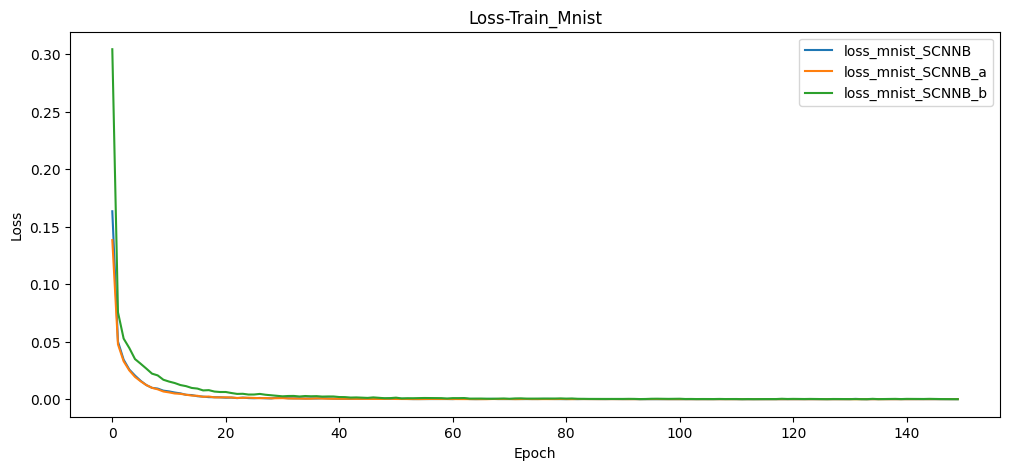

In [ ]:
fig3, ax3 = plt.subplots(figsize=(12, 5))
ax3.plot(history_mnist_SCNNB.history["loss"], label="loss_mnist_SCNNB")
ax3.plot(history_mnist_SCNNB_a.history["loss"], label="loss_mnist_SCNNB_a")
ax3.plot(history_mnist_SCNNB_b.history["loss"], label="loss_mnist_SCNNB_b")
plt.title("Loss-Train_Mnist")
plt.xlabel("Epoch")
plt.ylabel("Loss")
ax3.legend()

In [ ]:
# SCNNB - fashion_mnist with RandomFlip:
model_fashion_mnist_SCNNB = keras.models.Sequential([
    keras.layers.RandomFlip(mode='horizontal_and_vertical',seed = 50,input_shape=[28, 28, 1]),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),   #1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),  #2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_fashion_mnist_SCNNB.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_fashion_mnist_SCNNB = model_fashion_mnist_SCNNB.fit(fashion_mnist_x_train, fashion_mnist_y_train,batch_size=128, epochs=150, validation_data=(fashion_mnist_x_test, fashion_mnist_y_test))

Epoch 1/150
469/469 [==============================] - 4s 7ms/step - loss: 0.6162 - accuracy: 0.7829 - mse: 27.6751 - mae: 4.4200 - val_loss: 0.5105 - val_accuracy: 0.8081 - val_mse: 27.6766 - val_mae: 4.4200
Epoch 2/150
469/469 [==============================] - 4s 8ms/step - loss: 0.4111 - accuracy: 0.8518 - mse: 27.6809 - mae: 4.4200 - val_loss: 0.4618 - val_accuracy: 0.8302 - val_mse: 27.6812 - val_mae: 4.4200
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3631 - accuracy: 0.8672 - mse: 27.6827 - mae: 4.4200 - val_loss: 0.3484 - val_accuracy: 0.8725 - val_mse: 27.6828 - val_mae: 4.4200
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3334 - accuracy: 0.8784 - mse: 27.6837 - mae: 4.4200 - val_loss: 0.3262 - val_accuracy: 0.8808 - val_mse: 27.6852 - val_mae: 4.4200
Epoch 5/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3162 - accuracy: 0.8847 - mse: 27.6843 - mae: 4.4200 - val_loss: 0.3546 - val_accuracy:

In [ ]:
test_loss_fashion_mnist_SCNNB , test_acc_fashion_mnist_SCNNB ,test_mse_fashion_mnist_SCNNB, test_mae_fashion_mnist_SCNNB= model_fashion_mnist_SCNNB.evaluate(fashion_mnist_x_test,fashion_mnist_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.9220 - mse: 27.6969 - mae: 4.4200


In [ ]:
# SCNNB_a - fashion_mnist with RandomFlip:
model_fashion_mnist_SCNNB_a = keras.models.Sequential([
    keras.layers.RandomFlip(mode='horizontal_and_vertical',seed = 50,input_shape=[28, 28, 1]),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    #BatchNormalization(),  #1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),  #2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_fashion_mnist_SCNNB_a.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_fashion_mnist_SCNNB_a = model_fashion_mnist_SCNNB_a.fit(fashion_mnist_x_train, fashion_mnist_y_train,batch_size=128, epochs=150, validation_data=(fashion_mnist_x_test, fashion_mnist_y_test))

Epoch 1/150
469/469 [==============================] - 4s 7ms/step - loss: 0.5899 - accuracy: 0.7847 - mse: 27.6722 - mae: 4.4200 - val_loss: 0.4920 - val_accuracy: 0.8177 - val_mse: 27.6724 - val_mae: 4.4200
Epoch 2/150
469/469 [==============================] - 4s 8ms/step - loss: 0.4074 - accuracy: 0.8521 - mse: 27.6797 - mae: 4.4200 - val_loss: 0.3939 - val_accuracy: 0.8534 - val_mse: 27.6808 - val_mae: 4.4200
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3662 - accuracy: 0.8669 - mse: 27.6817 - mae: 4.4200 - val_loss: 0.3677 - val_accuracy: 0.8646 - val_mse: 27.6806 - val_mae: 4.4200
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3405 - accuracy: 0.8754 - mse: 27.6828 - mae: 4.4200 - val_loss: 0.3566 - val_accuracy: 0.8707 - val_mse: 27.6835 - val_mae: 4.4200
Epoch 5/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3177 - accuracy: 0.8842 - mse: 27.6838 - mae: 4.4200 - val_loss: 0.3641 - val_accuracy:

In [ ]:
test_loss_fashion_mnist_SCNNB_a , test_acc_fashion_mnist_SCNNB_a,test_mse_fashion_mnist_SCNNB_a, test_mae_fashion_mnist_SCNNB_a = model_fashion_mnist_SCNNB_a.evaluate(fashion_mnist_x_test,fashion_mnist_y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3908 - accuracy: 0.9210 - mse: 27.6961 - mae: 4.4200


In [ ]:
# SCNNB_b - fashion_mnist with RandomFlip:
model_fashion_mnist_SCNNB_b = keras.models.Sequential([
    keras.layers.RandomFlip(mode='horizontal_and_vertical',seed = 50,input_shape=[28, 28, 1]),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    #BatchNormalization(),   #1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    #BatchNormalization(),    #2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_fashion_mnist_SCNNB_b.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_fashion_mnist_SCNNB_b = model_fashion_mnist_SCNNB_b.fit(fashion_mnist_x_train, fashion_mnist_y_train,batch_size=128, epochs=150,validation_data=(fashion_mnist_x_test, fashion_mnist_y_test))


Epoch 1/150
469/469 [==============================] - 4s 7ms/step - loss: 0.8024 - accuracy: 0.7022 - mse: 27.6598 - mae: 4.4200 - val_loss: 0.5423 - val_accuracy: 0.8019 - val_mse: 27.6696 - val_mae: 4.4200
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.5121 - accuracy: 0.8108 - mse: 27.6730 - mae: 4.4200 - val_loss: 0.4749 - val_accuracy: 0.8283 - val_mse: 27.6731 - val_mae: 4.4200
Epoch 3/150
469/469 [==============================] - 3s 5ms/step - loss: 0.4442 - accuracy: 0.8369 - mse: 27.6763 - mae: 4.4200 - val_loss: 0.4029 - val_accuracy: 0.8550 - val_mse: 27.6776 - val_mae: 4.4200
Epoch 4/150
469/469 [==============================] - 2s 5ms/step - loss: 0.4020 - accuracy: 0.8529 - mse: 27.6785 - mae: 4.4200 - val_loss: 0.3976 - val_accuracy: 0.8533 - val_mse: 27.6785 - val_mae: 4.4200
Epoch 5/150
469/469 [==============================] - 2s 5ms/step - loss: 0.3708 - accuracy: 0.8658 - mse: 27.6802 - mae: 4.4200 - val_loss: 0.3539 - val_accuracy:

In [ ]:
test_loss_fashion_mnist_SCNNB_b , test_acc_fashion_mnist_SCNNB_b,test_mse_fashion_mnist_SCNNB_b, test_mae_fashion_mnist_SCNNB_b = model_fashion_mnist_SCNNB_b.evaluate(fashion_mnist_x_test,fashion_mnist_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3737 - accuracy: 0.9173 - mse: 27.6957 - mae: 4.4200


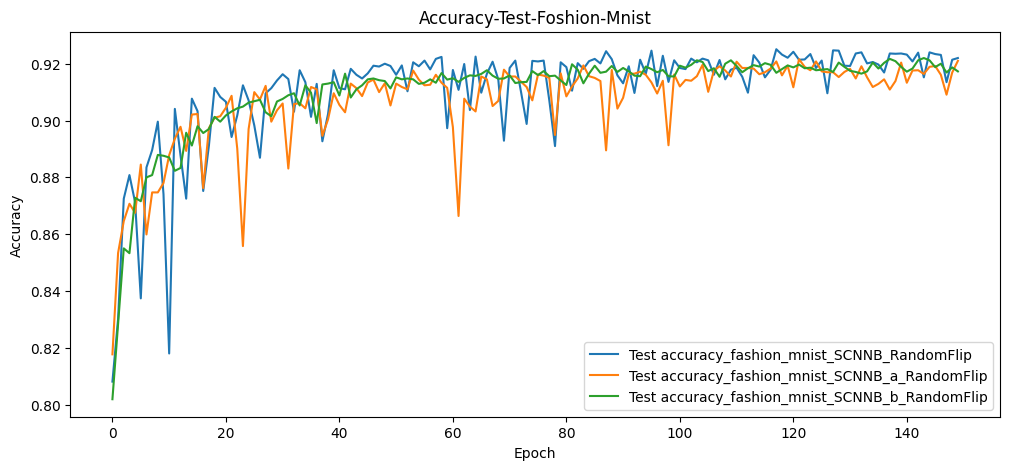

In [ ]:
fig21, ax21 = plt.subplots(figsize=(12, 5))
ax21.plot(history_fashion_mnist_SCNNB.history["val_accuracy"], label="Test accuracy_fashion_mnist_SCNNB_RandomFlip")
ax21.plot(history_fashion_mnist_SCNNB_a.history["val_accuracy"], label="Test accuracy_fashion_mnist_SCNNB_a_RandomFlip")
ax21.plot(history_fashion_mnist_SCNNB_b.history["val_accuracy"], label="Test accuracy_fashion_mnist_SCNNB_b_RandomFlip")
plt.title("Accuracy-Test-Foshion-Mnist")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax21.legend()

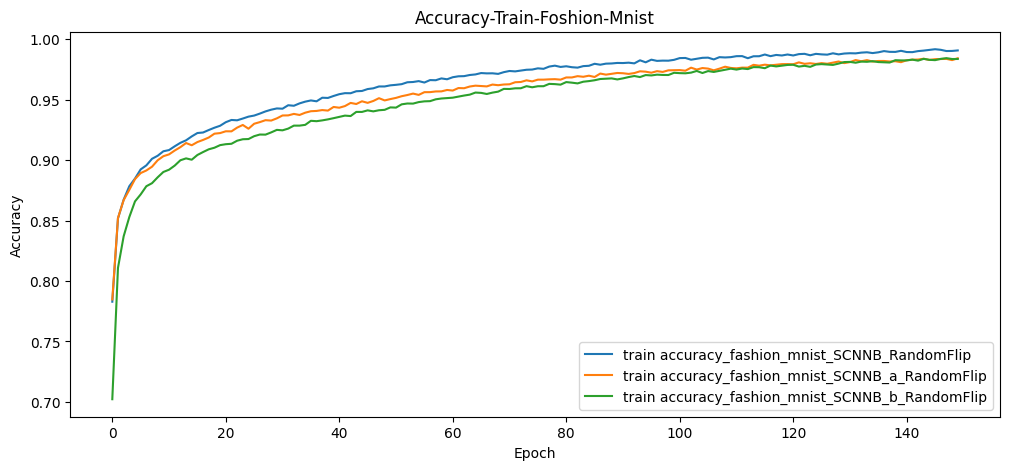

In [ ]:
fig22, ax22 = plt.subplots(figsize=(12, 5))
ax22.plot(history_fashion_mnist_SCNNB.history["accuracy"], label="train accuracy_fashion_mnist_SCNNB_RandomFlip")
ax22.plot(history_fashion_mnist_SCNNB_a.history["accuracy"], label="train accuracy_fashion_mnist_SCNNB_a_RandomFlip")
ax22.plot(history_fashion_mnist_SCNNB_b.history["accuracy"], label="train accuracy_fashion_mnist_SCNNB_b_RandomFlip")
plt.title("Accuracy-Train-Foshion-Mnist")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax22.legend()

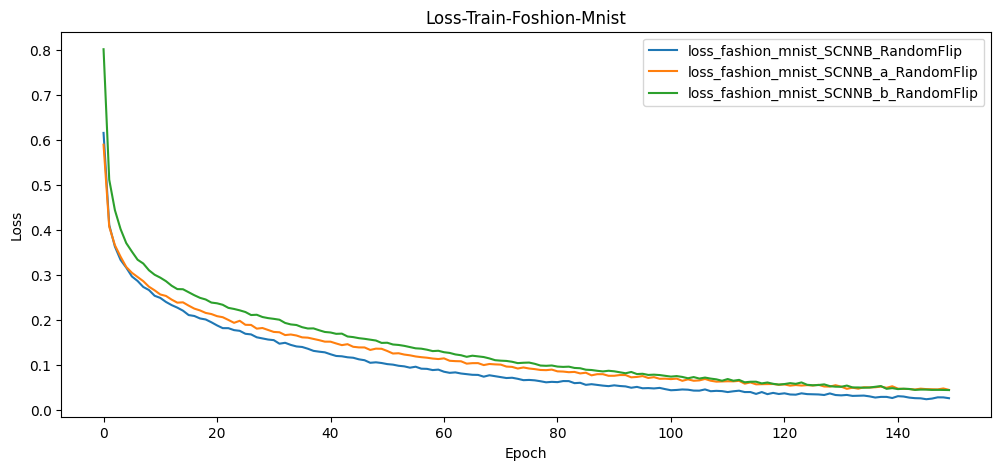

In [ ]:
fig23, ax23 = plt.subplots(figsize=(12, 5))
ax23.plot(history_fashion_mnist_SCNNB.history["loss"], label="loss_fashion_mnist_SCNNB_RandomFlip")
ax23.plot(history_fashion_mnist_SCNNB_a.history["loss"], label="loss_fashion_mnist_SCNNB_a_RandomFlip")
ax23.plot(history_fashion_mnist_SCNNB_b.history["loss"], label="loss_fashion_mnist_SCNNB_b_RandomFlip")
plt.title("Loss-Train-Foshion-Mnist")
plt.xlabel("Epoch")
plt.ylabel("Loss")
ax23.legend()

# 1-3-2-2: fashion-mnist:

In [ ]:
# SCNNB - fashion_mnist :
model_fashion_mnist_SCNNB = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[28, 28, 1]),
    BatchNormalization(),   #1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),  #2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_fashion_mnist_SCNNB.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_fashion_mnist_SCNNB = model_fashion_mnist_SCNNB.fit(fashion_mnist_x_train, fashion_mnist_y_train,batch_size=128, epochs=150, validation_data=(fashion_mnist_x_test, fashion_mnist_y_test))

Epoch 1/150
469/469 [==============================] - 13s 7ms/step - loss: 0.5057 - accuracy: 0.8238 - mse: 27.6799 - mae: 4.4200 - val_loss: 0.3945 - val_accuracy: 0.8509 - val_mse: 27.6797 - val_mae: 4.4200
Epoch 2/150
469/469 [==============================] - 3s 6ms/step - loss: 0.3333 - accuracy: 0.8791 - mse: 27.6844 - mae: 4.4200 - val_loss: 0.3224 - val_accuracy: 0.8782 - val_mse: 27.6830 - val_mae: 4.4200
Epoch 3/150
469/469 [==============================] - 4s 9ms/step - loss: 0.2866 - accuracy: 0.8939 - mse: 27.6861 - mae: 4.4200 - val_loss: 0.2854 - val_accuracy: 0.8946 - val_mse: 27.6861 - val_mae: 4.4200
Epoch 4/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2522 - accuracy: 0.9068 - mse: 27.6874 - mae: 4.4200 - val_loss: 0.2736 - val_accuracy: 0.9012 - val_mse: 27.6872 - val_mae: 4.4200
Epoch 5/150
469/469 [==============================] - 3s 6ms/step - loss: 0.2290 - accuracy: 0.9141 - mse: 27.6885 - mae: 4.4200 - val_loss: 0.2781 - val_accuracy

In [ ]:
model_fashion_mnist_SCNNB.save("model_fashion_mnist_SCNNB.h5")

In [ ]:
test_loss_fashion_mnist_SCNNB , test_acc_fashion_mnist_SCNNB ,test_mse_fashion_mnist_SCNNB, test_mae_fashion_mnist_SCNNB= model_fashion_mnist_SCNNB.evaluate(fashion_mnist_x_test,fashion_mnist_y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6884 - accuracy: 0.9247 - mse: 27.6982 - mae: 4.4200


In [ ]:
# SCNNB_a - fashion_mnist:
model_fashion_mnist_SCNNB_a = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[28, 28, 1]),
    #BatchNormalization(),  #1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),   #2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_fashion_mnist_SCNNB_a.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_fashion_mnist_SCNNB_a = model_fashion_mnist_SCNNB_a.fit(fashion_mnist_x_train, fashion_mnist_y_train,batch_size=128, epochs=150, validation_data=(fashion_mnist_x_test, fashion_mnist_y_test))

Epoch 1/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0025 - accuracy: 0.9992 - mse: 27.6999 - mae: 4.4200 - val_loss: 0.7598 - val_accuracy: 0.9217 - val_mse: 27.6981 - val_mae: 4.4200
Epoch 2/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0023 - accuracy: 0.9991 - mse: 27.6999 - mae: 4.4200 - val_loss: 0.6982 - val_accuracy: 0.9215 - val_mse: 27.6979 - val_mae: 4.4200
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0033 - accuracy: 0.9988 - mse: 27.6998 - mae: 4.4200 - val_loss: 0.7221 - val_accuracy: 0.9179 - val_mse: 27.6979 - val_mae: 4.4200
Epoch 4/150
469/469 [==============================] - 3s 5ms/step - loss: 0.0025 - accuracy: 0.9992 - mse: 27.6998 - mae: 4.4200 - val_loss: 0.6879 - val_accuracy: 0.9201 - val_mse: 27.6979 - val_mae: 4.4200
Epoch 5/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0020 - accuracy: 0.9993 - mse: 27.6999 - mae: 4.4200 - val_loss: 0.7051 - val_accuracy:

In [ ]:
model_fashion_mnist_SCNNB_a.save("model_fashion_mnist_SCNNB_a.h5")

In [ ]:
test_loss_fashion_mnist_SCNNB_a , test_acc_fashion_mnist_SCNNB_a,test_mse_fashion_mnist_SCNNB_a, test_mae_fashion_mnist_SCNNB_a = model_fashion_mnist_SCNNB_a.evaluate(fashion_mnist_x_test,fashion_mnist_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8129 - accuracy: 0.9227 - mse: 27.6983 - mae: 4.4200


In [ ]:
# SCNNB_b - fashion_mnist:
model_fashion_mnist_SCNNB_b = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[28, 28, 1]),
    #BatchNormalization(),   #1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    #BatchNormalization(),    #2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_fashion_mnist_SCNNB_b.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_fashion_mnist_SCNNB_b = model_fashion_mnist_SCNNB_b.fit(fashion_mnist_x_train, fashion_mnist_y_train,batch_size=128, epochs=150,validation_data=(fashion_mnist_x_test, fashion_mnist_y_test))

Epoch 1/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.9991 - mse: 27.6998 - mae: 4.4200 - val_loss: 0.6154 - val_accuracy: 0.9209 - val_mse: 27.6979 - val_mae: 4.4200
Epoch 2/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.9992 - mse: 27.6998 - mae: 4.4200 - val_loss: 0.6154 - val_accuracy: 0.9229 - val_mse: 27.6979 - val_mae: 4.4200
Epoch 3/150
469/469 [==============================] - 3s 6ms/step - loss: 0.0030 - accuracy: 0.9991 - mse: 27.6998 - mae: 4.4200 - val_loss: 0.6015 - val_accuracy: 0.9225 - val_mse: 27.6979 - val_mae: 4.4200
Epoch 4/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0022 - accuracy: 0.9993 - mse: 27.6998 - mae: 4.4200 - val_loss: 0.6110 - val_accuracy: 0.9201 - val_mse: 27.6979 - val_mae: 4.4200
Epoch 5/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0023 - accuracy: 0.9995 - mse: 27.6998 - mae: 4.4200 - val_loss: 0.6330 - val_accuracy:

In [ ]:
model_fashion_mnist_SCNNB_b.save("model_fashion_mnist_SCNNB_b.h5")

In [ ]:
test_loss_fashion_mnist_SCNNB_b , test_acc_fashion_mnist_SCNNB_b,test_mse_fashion_mnist_SCNNB_b, test_mae_fashion_mnist_SCNNB_b = model_fashion_mnist_SCNNB_b.evaluate(fashion_mnist_x_test,fashion_mnist_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.9204 - mse: 27.6983 - mae: 4.4200


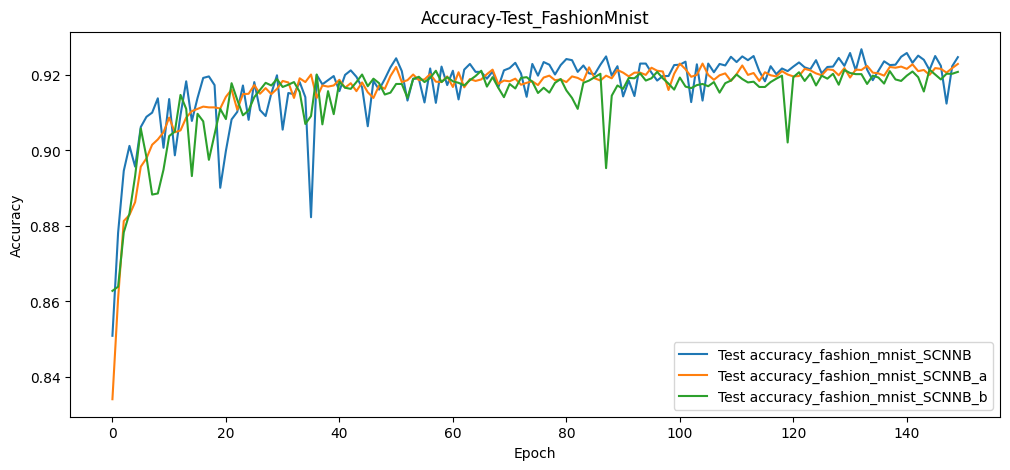

In [ ]:
fig21, ax21 = plt.subplots(figsize=(12, 5))
ax21.plot(history_fashion_mnist_SCNNB.history["val_accuracy"], label="Test accuracy_fashion_mnist_SCNNB")
ax21.plot(history_fashion_mnist_SCNNB_a.history["val_accuracy"], label="Test accuracy_fashion_mnist_SCNNB_a")
ax21.plot(history_fashion_mnist_SCNNB_b.history["val_accuracy"], label="Test accuracy_fashion_mnist_SCNNB_b")
plt.title("Accuracy-Test_FashionMnist")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax21.legend()

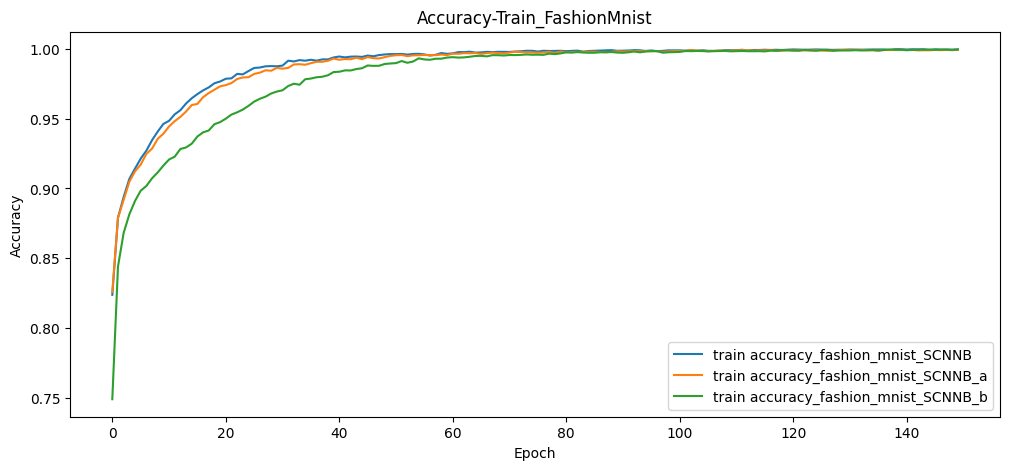

In [ ]:
fig22, ax22 = plt.subplots(figsize=(12, 5))
ax22.plot(history_fashion_mnist_SCNNB.history["accuracy"], label="train accuracy_fashion_mnist_SCNNB")
ax22.plot(history_fashion_mnist_SCNNB_a.history["accuracy"], label="train accuracy_fashion_mnist_SCNNB_a")
ax22.plot(history_fashion_mnist_SCNNB_b.history["accuracy"], label="train accuracy_fashion_mnist_SCNNB_b")
plt.title("Accuracy-Train_FashionMnist")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax22.legend()

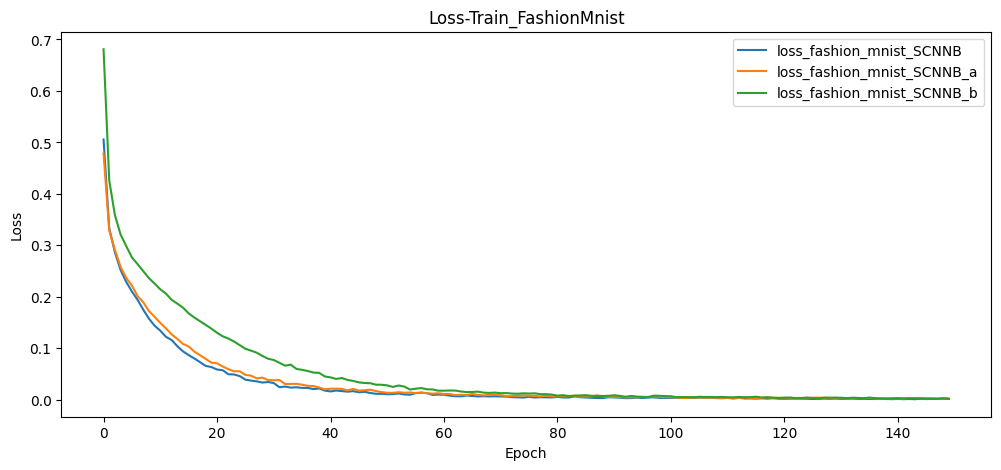

In [ ]:
fig23, ax23 = plt.subplots(figsize=(12, 5))
ax23.plot(history_fashion_mnist_SCNNB.history["loss"], label="loss_fashion_mnist_SCNNB")
ax23.plot(history_fashion_mnist_SCNNB_a.history["loss"], label="loss_fashion_mnist_SCNNB_a")
ax23.plot(history_fashion_mnist_SCNNB_b.history["loss"], label="loss_fashion_mnist_SCNNB_b")
plt.title("Loss-Train_FashionMnist")
plt.xlabel("Epoch")
plt.ylabel("Loss")
ax23.legend()

# 1-3-3: cifar10:

In [ ]:
# SCNNB - cifar10:
model_cifar10_SCNNB = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[32, 32, 3]),
    BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_cifar10_SCNNB.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_cifar10_SCNNB = model_cifar10_SCNNB.fit(cifar10_x_train, cifar10_y_train,batch_size=128, epochs=150, validation_data=(cifar10_x_test, cifar10_y_test))

Epoch 1/150
391/391 [==============================] - 5s 10ms/step - loss: 1.5866 - accuracy: 0.4556 - mse: 27.6398 - mae: 4.4200 - val_loss: 1.3012 - val_accuracy: 0.5303 - val_mse: 27.6375 - val_mae: 4.4200
Epoch 2/150
391/391 [==============================] - 3s 8ms/step - loss: 1.1667 - accuracy: 0.5900 - mse: 27.6487 - mae: 4.4200 - val_loss: 1.0917 - val_accuracy: 0.6185 - val_mse: 27.6506 - val_mae: 4.4200
Epoch 3/150
391/391 [==============================] - 3s 8ms/step - loss: 0.9601 - accuracy: 0.6653 - mse: 27.6559 - mae: 4.4200 - val_loss: 1.1838 - val_accuracy: 0.5844 - val_mse: 27.6493 - val_mae: 4.4200
Epoch 4/150
391/391 [==============================] - 3s 7ms/step - loss: 0.8221 - accuracy: 0.7159 - mse: 27.6610 - mae: 4.4200 - val_loss: 0.9756 - val_accuracy: 0.6646 - val_mse: 27.6567 - val_mae: 4.4200
Epoch 5/150
391/391 [==============================] - 3s 8ms/step - loss: 0.7155 - accuracy: 0.7508 - mse: 27.6653 - mae: 4.4200 - val_loss: 0.9777 - val_accuracy

In [ ]:
test_loss_cifar10_SCNNB , test_acc_cifar10_SCNNB ,test_mse_cifar10_SCNNB, test_mae_cifar10_SCNNB= model_cifar10_SCNNB.evaluate(cifar10_x_test,cifar10_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8586 - accuracy: 0.7491 - mse: 27.6922 - mae: 4.4200


In [ ]:
# SCNNB_a - cifar10:
model_cifar10_SCNNB_a = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[32, 32, 3]),
    #BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_cifar10_SCNNB_a.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_cifar10_SCNNB_a = model_cifar10_SCNNB_a.fit(cifar10_x_train, cifar10_y_train,batch_size=128, epochs=150, validation_data=(cifar10_x_test, cifar10_y_test))

Epoch 1/150
391/391 [==============================] - 3s 8ms/step - loss: 1.7324 - accuracy: 0.3705 - mse: 27.6243 - mae: 4.4200 - val_loss: 1.4738 - val_accuracy: 0.4771 - val_mse: 27.6338 - val_mae: 4.4200
Epoch 2/150
391/391 [==============================] - 2s 6ms/step - loss: 1.3186 - accuracy: 0.5305 - mse: 27.6386 - mae: 4.4200 - val_loss: 1.1562 - val_accuracy: 0.5891 - val_mse: 27.6406 - val_mae: 4.4200
Epoch 3/150
391/391 [==============================] - 2s 6ms/step - loss: 1.1310 - accuracy: 0.5986 - mse: 27.6463 - mae: 4.4200 - val_loss: 1.0561 - val_accuracy: 0.6281 - val_mse: 27.6490 - val_mae: 4.4200
Epoch 4/150
391/391 [==============================] - 3s 8ms/step - loss: 0.9990 - accuracy: 0.6492 - mse: 27.6522 - mae: 4.4200 - val_loss: 0.9992 - val_accuracy: 0.6452 - val_mse: 27.6518 - val_mae: 4.4200
Epoch 5/150
391/391 [==============================] - 2s 6ms/step - loss: 0.8842 - accuracy: 0.6916 - mse: 27.6568 - mae: 4.4200 - val_loss: 0.9312 - val_accuracy:

In [ ]:
test_loss_cifar10_SCNNB_a , test_acc_cifar10_SCNNB_a, test_mse_cifar10_SCNNB_a, test_mae_cifar10_SCNNB_a = model_cifar10_SCNNB_a.evaluate(cifar10_x_test,cifar10_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.1003 - accuracy: 0.7439 - mse: 27.6926 - mae: 4.4200


In [ ]:
# SCNNB_b - cifar10:
model_cifar10_SCNNB_b = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=[32, 32, 3]),
    #BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    #BatchNormalization(),  #
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
sgd = SGD(learning_rate=0.02, momentum=0.9,decay=0.000005)
model_cifar10_SCNNB_b.compile(optimizer=sgd,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy","mse","mae"])

In [ ]:
history_cifar10_SCNNB_b = model_cifar10_SCNNB_b.fit(cifar10_x_train, cifar10_y_train,batch_size=128, epochs=150,  validation_data=(cifar10_x_test, cifar10_y_test))

Epoch 1/150
391/391 [==============================] - 4s 10ms/step - loss: 1.4877 - accuracy: 0.4705 - mse: 27.6362 - mae: 4.4200 - val_loss: 1.9557 - val_accuracy: 0.3924 - val_mse: 27.6414 - val_mae: 4.4200
Epoch 2/150
391/391 [==============================] - 3s 7ms/step - loss: 1.1595 - accuracy: 0.5945 - mse: 27.6462 - mae: 4.4200 - val_loss: 1.4280 - val_accuracy: 0.5145 - val_mse: 27.6469 - val_mae: 4.4200
Epoch 3/150
391/391 [==============================] - 3s 7ms/step - loss: 1.0176 - accuracy: 0.6433 - mse: 27.6522 - mae: 4.4200 - val_loss: 1.0196 - val_accuracy: 0.6475 - val_mse: 27.6559 - val_mae: 4.4200
Epoch 4/150
391/391 [==============================] - 3s 7ms/step - loss: 0.9205 - accuracy: 0.6804 - mse: 27.6563 - mae: 4.4200 - val_loss: 1.1362 - val_accuracy: 0.6118 - val_mse: 27.6529 - val_mae: 4.4200
Epoch 5/150
391/391 [==============================] - 3s 7ms/step - loss: 0.8286 - accuracy: 0.7128 - mse: 27.6601 - mae: 4.4200 - val_loss: 1.4223 - val_accuracy

In [ ]:
test_loss_cifar10_SCNNB_b , test_acc_cifar10_SCNNB_b ,test_mse_cifar10_SCNNB_b, test_mae_cifar10_SCNNB_b= model_cifar10_SCNNB_b.evaluate(cifar10_x_test,cifar10_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7445 - accuracy: 0.7246 - mse: 27.6888 - mae: 4.4200


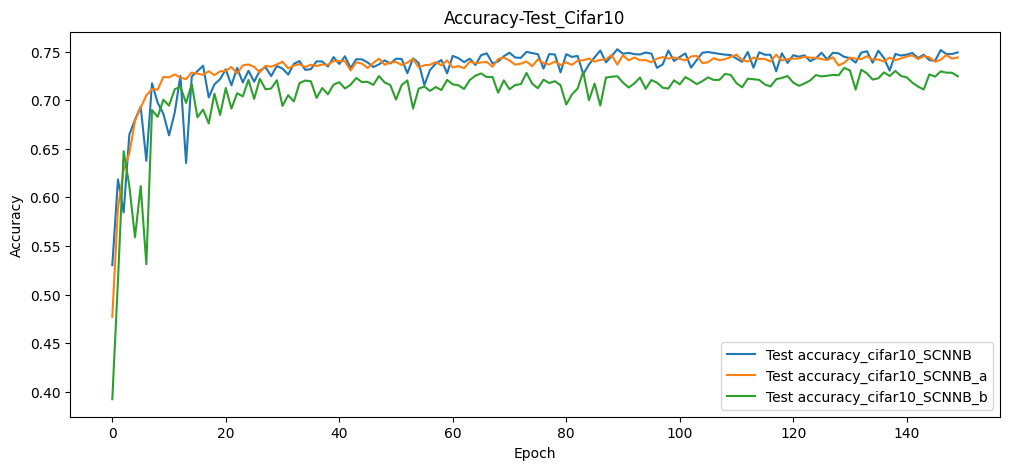

In [ ]:
fig31, ax31 = plt.subplots(figsize=(12, 5))
ax31.plot(history_cifar10_SCNNB.history["val_accuracy"], label="Test accuracy_cifar10_SCNNB")
ax31.plot(history_cifar10_SCNNB_a.history["val_accuracy"], label="Test accuracy_cifar10_SCNNB_a")
ax31.plot(history_cifar10_SCNNB_b.history["val_accuracy"], label="Test accuracy_cifar10_SCNNB_b")
plt.title("Accuracy-Test_Cifar10")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax31.legend()

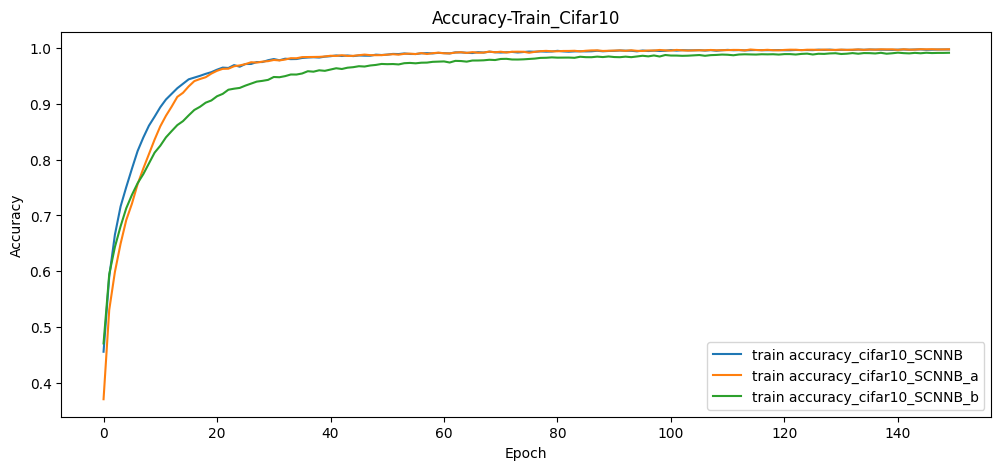

In [ ]:
fig32, ax32 = plt.subplots(figsize=(12, 5))
ax32.plot(history_cifar10_SCNNB.history["accuracy"], label="train accuracy_cifar10_SCNNB")
ax32.plot(history_cifar10_SCNNB_b.history["accuracy"], label="train accuracy_cifar10_SCNNB_a")
ax32.plot(history_cifar10_SCNNB_a.history["accuracy"], label="train accuracy_cifar10_SCNNB_b")
plt.title("Accuracy-Train_Cifar10")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax32.legend()

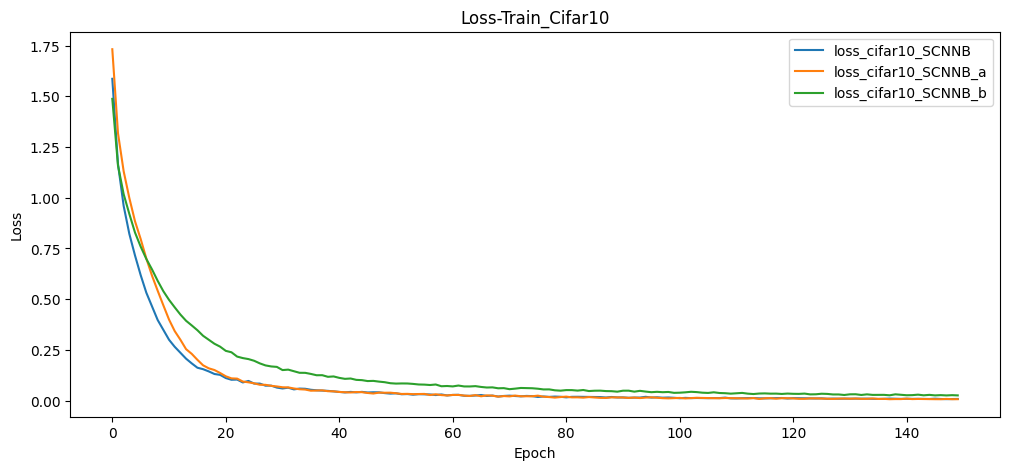

In [ ]:
fig33, ax33 = plt.subplots(figsize=(12, 5))
ax33.plot(history_cifar10_SCNNB.history["loss"], label="loss_cifar10_SCNNB")
ax33.plot(history_cifar10_SCNNB_b.history["loss"], label="loss_cifar10_SCNNB_a")
ax33.plot(history_cifar10_SCNNB_a.history["loss"], label="loss_cifar10_SCNNB_b")
plt.title("Loss-Train_Cifar10")
plt.xlabel("Epoch")
plt.ylabel("Loss")
ax33.legend()

In [ ]:
#-------------------------------------------------------------------------------